In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math

def generateDataFrames(filename):
    times = [[],[],[]]
    calculations = [[],[],[]]

    with open(filename, 'r') as file:
        for line in file:
            pairs = line.strip().split()
            for idx, pair in enumerate(pairs):
                time, calc = map(float, pair.split(':'))
                times[idx % 3].append(time)
                calc = np.abs(calc - math.pi)
                calc = (calc / math.pi) * 100 
                calculations[idx % 3].append(calc)

    df = pd.DataFrame({
        'time_serial': times[0],
        'time_monte_carlo': times[1],
        'time_circle_area': times[2],
        'calc_serial': calculations[0],
        'calc_monte_carlo': calculations[1],
        'calc_circle_area': calculations[2]
    })

    return df

def filterData(df):
    for time_col in ['time_serial', 'time_monte_carlo', 'time_circle_area']:
        Q1 = df[time_col].quantile(0.25)
        Q3 = df[time_col].quantile(0.75)
        IQR = Q3 - Q1

        filtered_data = df[time_col][~((df[time_col] < (Q1 - 1.5 * IQR)) | (df[time_col] > (Q3 + 1.5 * IQR)))]

    return filtered_data

def add_execution_times(pairs, label=None, color='black', style=''):
    pairs.sort(key=lambda x: int(x[0]))

    cores = [int(pair[0]) for pair in pairs]
    times = [pair[1] for pair in pairs]

    plt.plot(cores, times, style, label=label, color=color)
    
    if label:
        plt.legend()


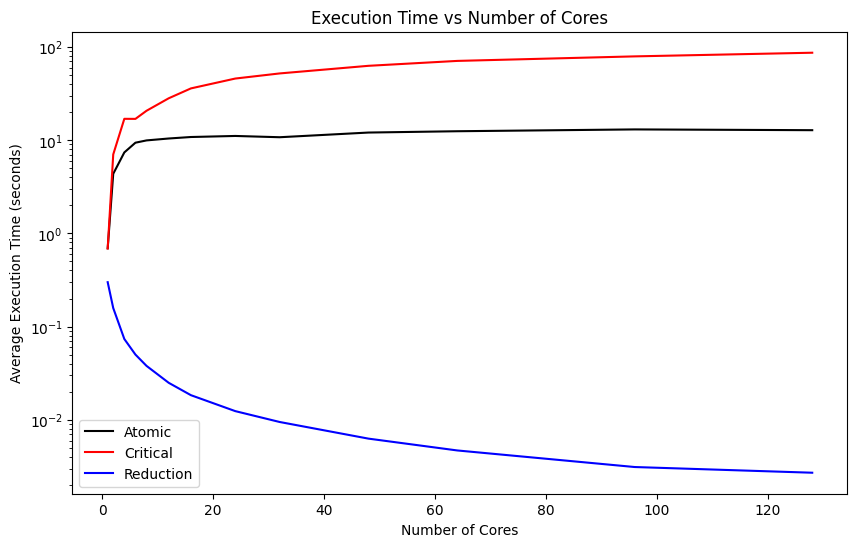

In [68]:
folder_path = 'data/atomic-results'
pairs = []

plt.figure(figsize=(10, 6))
plt.xlabel('Number of Cores')
plt.ylabel('Average Execution Time (seconds)')
plt.yscale('log')

plt.title('Execution Time vs Number of Cores')

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df = generateDataFrames("data/atomic-results/" + filename)
        filterData(df)
        pair = (filename.split(".")[0], df["time_circle_area"].mean())
        pairs.append(pair)

add_execution_times(pairs, "Atomic", "black")

folder_path = 'data/critical-results'
pairs = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df = generateDataFrames("data/critical-results/" + filename)
        filterData(df)
        pair = (filename.split(".")[0], df["time_circle_area"].mean())
        pairs.append(pair)

add_execution_times(pairs, "Critical", "red")

folder_path = 'data/100-million-results'
pairs = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df = generateDataFrames("data/100-million-results/" + filename)
        filterData(df)
        pair = (filename.split(".")[0], df["time_circle_area"].mean())
        pairs.append(pair)

add_execution_times(pairs, "Reduction", "blue")

        

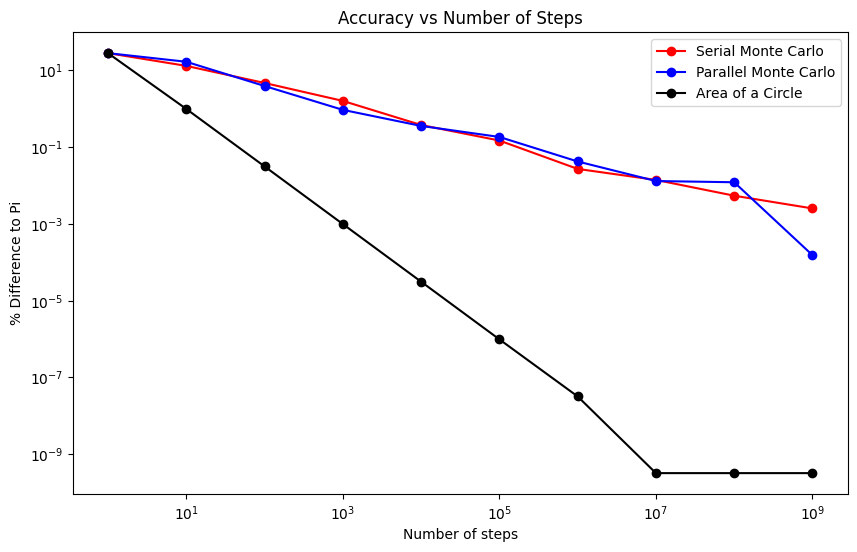

In [69]:
folder_path = 'data/accuracy-results'

pairs = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df = generateDataFrames("data/accuracy-results/" + filename)
        filterData(df)
        pair = (filename.split(".")[0], df["calc_serial"].mean())
        pairs.append(pair)

plt.figure(figsize=(10, 6))
plt.xlabel('Number of steps')
plt.ylabel('% Difference to Pi')
plt.xscale('log')
plt.yscale('log')

plt.title('Accuracy vs Number of Steps')

add_execution_times(pairs, "Serial Monte Carlo", "red", "-o")

pairs = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df = generateDataFrames("data/accuracy-results/" + filename)
        filterData(df)
        pair = (filename.split(".")[0], df["calc_monte_carlo"].mean())
        pairs.append(pair)

add_execution_times(pairs, "Parallel Monte Carlo", "blue", "-o")

pairs = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df = generateDataFrames("data/accuracy-results/" + filename)
        filterData(df)
        pair = (filename.split(".")[0], df["calc_circle_area"].mean())
        pairs.append(pair)

add_execution_times(pairs, "Area of a Circle", "black", "-o")



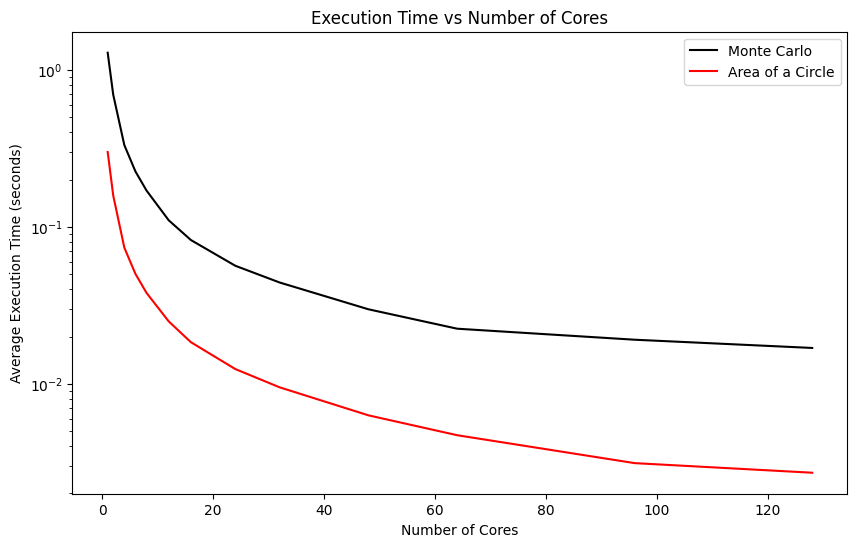

In [75]:
folder_path = 'data/100-million-results'
pairs = []

plt.figure(figsize=(10, 6))
plt.xlabel('Number of Cores')
plt.ylabel('Average Execution Time (seconds)')
plt.yscale('log')

plt.title('Execution Time vs Number of Cores')

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df = generateDataFrames("data/atomic-results/" + filename)
        filterData(df)
        pair = (filename.split(".")[0], df["time_monte_carlo"].mean())
        pairs.append(pair)

add_execution_times(pairs, "Monte Carlo", "black")

folder_path = 'data/100-million-results'
pairs = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df = generateDataFrames("data/100-million-results/" + filename)
        filterData(df)
        pair = (filename.split(".")[0], df["time_circle_area"].mean())
        pairs.append(pair)

add_execution_times(pairs, "Area of a Circle", "red")
